# Meanshift for 1D Clustering

This notebook uses the so-called **meanshift** method to cluster 1D data. It is widely used in image segmentation.

### Reference

* [MeanShift API in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)
* [Clustering method 2 - Mean Shift](https://medium.com/ai-academy-taiwan/clustering-method-2-cd9bb883a0cb)
* [Understanding Mean Shift Clustering and Implementation with Python](https://towardsdatascience.com/understanding-*mean-shift-clustering-and-implementation-with-python-6d5809a2ac40)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

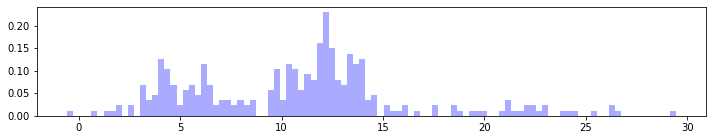

In [2]:
data = np.array(list(np.random.normal(5, 2, 100)) + 
                 list(np.random.normal(12, 1.5, 150)) +
                 list(np.random.normal(21, 4, 40)))

plt.figure(figsize=(12, 2))
plt.hist(data, bins=100, fc="#AAAAFF", density=True)
plt.show()

## Train Meanshift

In [3]:

X = data.reshape(-1, 1)

#estimate bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=len(data))

#Mean Shift method
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X)
labels = model.predict(X)

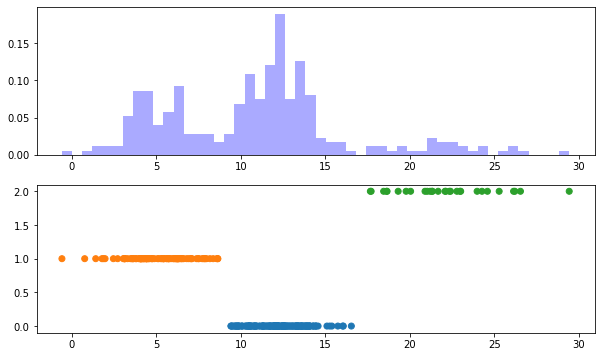

In [4]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig, axs = plt.subplots(2, figsize=(10, 6))

axs[0].hist(data, bins=50, fc="#AAAAFF", density=True)
axs[1].scatter(data, labels, c=[colors[x] for x in labels])

plt.show()

## Visualize 1D Clustering Result

To better visualize the clustering result compared to histogram, we can use `numpy.histogram` function to generate the probability density of the data. (See [Matplotlib: How to convert a histogram to a discrete probability mass function?](https://stackoverflow.com/questions/11750276/matplotlib-how-to-convert-a-histogram-to-a-discrete-probability-mass-function)):

<ipython-input-5-ea567dbc8249>:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  prob, x = np.histogram(data, bins=100, normed=True)


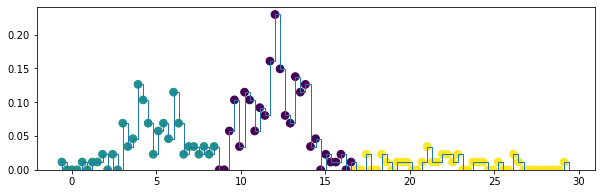

In [5]:
plt.figure(figsize=(10, 3))

prob, x = np.histogram(data, bins=100, normed=True)
labels = model.predict(x[:-1].reshape(-1, 1))

plt.hist(data, bins=100, fc="#AAAAFF", density=True, histtype="step")
plt.scatter(x[:-1], prob, c=labels, s=60)
plt.show()

## Image Segmentation

Example is on [Clustering method 2 - Mean Shift](https://medium.com/ai-academy-taiwan/clustering-method-2-cd9bb883a0cb).

348 286 3


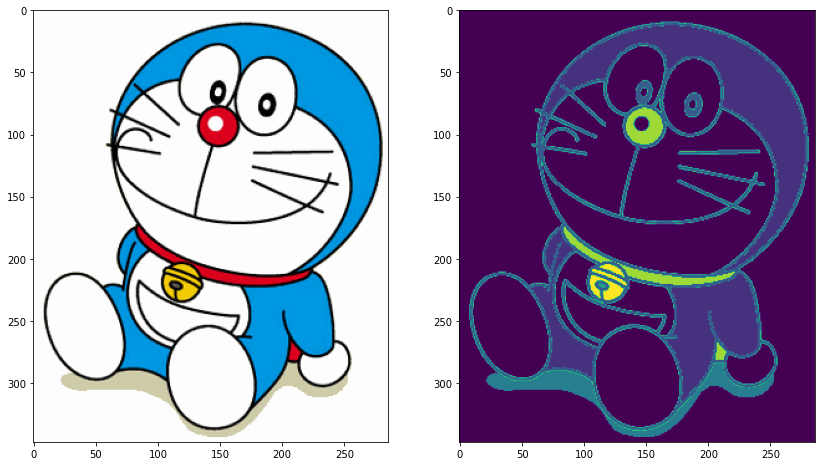

In [6]:
from skimage.transform import rescale
import cv2
#load image
img = cv2.imread('data/Doraemon.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = rescale(img, 0.8)
rows, cols, chs= img.shape

print(rows, cols, chs)

#convert image shape [rows, cols, 3] into [rows*cols, 3]
feature_img = np.reshape(img, [rows*cols, 3])

#estimate bandwidth
bandwidth = estimate_bandwidth(feature_img, quantile=0.3, n_samples=2000)

#Mean Shift method
model = MeanShift(bandwidth = bandwidth, bin_seeding = True)
labels = model.fit_predict(feature_img)

#results visualization
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)    
ax.imshow(img)
ax1.imshow(np.reshape(labels, [rows, cols]))
plt.show()

In [97]:
len(labels)

99528